In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [27]:
# 1. Load data
df = pd.read_csv("C:/Users/USER1/Downloads/MLBB Professional Match/Match.csv")


In [28]:
# 2. Pilih fitur dan target
features = [
    'blue', 'red', 'time(minutes)',
    'pick_blue_1', 'pick_blue_2', 'pick_blue_3', 'pick_blue_4', 'pick_blue_5',
    'pick_red_1', 'pick_red_2', 'pick_red_3', 'pick_red_4', 'pick_red_5'
]
target = 'win_team'

X = df[features]
y = df[target]

In [29]:
# 3. Ambil fitur dan target
X = df[features].copy()  # <- pakai copy() untuk hindari warning
y = df[target]

In [30]:
# 4. Encode kolom kategorikal (tim & hero)
le_dict = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # pastikan semua string
    le_dict[col] = le

In [31]:
# Encode target juga
le_target = LabelEncoder()
y = le_target.fit_transform(y.astype(str))

In [32]:
# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [33]:
# 6. Buat model Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
# 7. Evaluasi model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))



Accuracy: 0.5037593984962406

Classification Report:
               precision    recall  f1-score   support

        blue       0.48      0.73      0.58        63
         red       0.55      0.30      0.39        70

    accuracy                           0.50       133
   macro avg       0.52      0.52      0.49       133
weighted avg       0.52      0.50      0.48       133



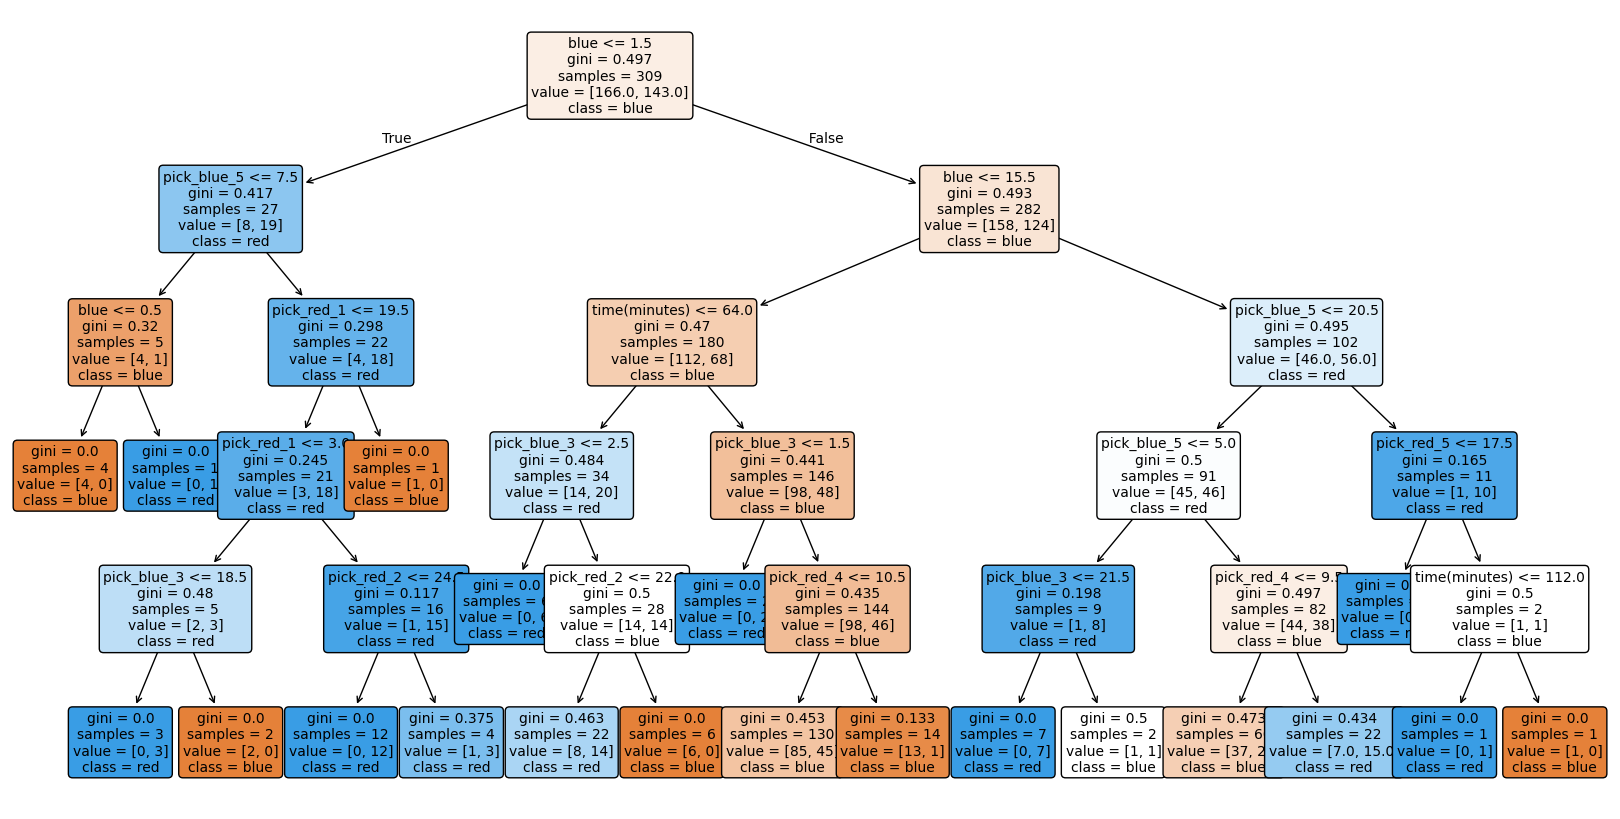

In [35]:
# Tentukan ukuran figure yang lebih besar dan sesuaikan jaraknya
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Menyesuaikan plot tree agar lebih rapi
plot_tree(model,
          filled=True,
          feature_names=features,
          class_names=le_target.classes_,
          rounded=True,
          fontsize=10,
          ax=ax)

# Sesuaikan jarak antara elemen-elemen plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

# 📊 Penjelasan Pohon Keputusan untuk Prediksi Pemenang Tim Mobile Legends

- **Node** = pengambilan keputusan berdasarkan fitur tertentu
- **Leaf** = hasil akhir prediksi (class = red / blue)
- **Gini** = ukuran ketidakteraturan atau impurity. Nilai Gini berkisar dari 0 hingga 0.5:
  - Gini = 0 artinya node sangat murni (semua data termasuk ke satu kelas)
  - Gini mendekati 0.5 artinya distribusi data di node hampir seimbang antara dua kelas

---

- **Node** = pengambilan keputusan berdasarkan fitur tertentu
- **Leaf** = hasil akhir prediksi (class = red / blue)
- **Gini** = ukuran ketidakteraturan data di node. Semakin kecil, semakin murni

---

## 🔝 1. Root Node (Node Utama)
```
blue <= 1.5
gini = 0.497
samples = 309
value = [166.0, 143.0]
class = blue
```
Artinya: Jika ID tim biru (setelah encoding) kurang dari atau sama dengan 1.5, maka sebagian besar pertandingan dimenangkan oleh tim biru.

---

## ↪️ 2. Cabang Kiri (True untuk `blue <= 1.5`)
Node berikutnya membandingkan:
```
pick_blue_5 <= 7.5
```
Kita lihat hero ke-5 yang dipilih oleh tim biru. Model akan terus memecah berdasarkan hero lain yang dipilih, hero yang di-ban, atau durasi game.

---

## 🎯 3. Leaf Node (Akhir Prediksi)
```
gini = 0.0
samples = 4
value = [4, 0]
class = blue
```
Berarti: dalam 4 pertandingan yang memenuhi kondisi sebelumnya, semuanya dimenangkan oleh tim biru. Tidak ada keraguan (gini = 0).

---

